In [1]:
import geopandas
import matplotlib.pyplot as plt
import pandas
import libpysal
from tobler.util import h3fy
from tobler.area_weighted import area_interpolate
# %load_ext watermark
# %watermark -v -a "author: eli knaap" -d -u -p tobler,cenpy,geopandas

C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:111: UserWarning: The Shapely GEOS version (3.10.2-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [2]:
import contextily as ctx
# from cenpy import products

C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [4]:
dc = geopandas.read_file('../Data/Facilities/Admin3Poly.gpkg', layer='All-Admin-Area-Egypt').to_crs("EPSG:3857") #Polygon
dc.head()
# dc = geopandas.read_file("../Data/Facilities/Admin3Poly.gpkg", layer='All-Admin-Area-Egypt').to_crs("EPSG:3857")  # Polygon

,adm3_ar,adm3_pcode,shape_leng,shape_area,PM2.5,PM10,geometry
0,الجزيره,EG120918,0.055274,0.000157,33,54,"MULTIPOLYGON (((3511515.638 3643652.806, 35115..."
1,الجهاد 4,EG240525,0.101889,0.000594,33,54,"MULTIPOLYGON (((3421690.272 3342908.962, 34216..."
2,أم الرضا الجديدة,EG110437,0.049183,0.000103,33,54,"MULTIPOLYGON (((3521136.065 3686124.664, 35205..."
3,رأس محمد,EG350502,0.044184,0.000094,33,54,"MULTIPOLYGON (((3812019.933 3218627.676, 38121..."
4,مبارك,EG120565,0.044160,0.000122,33,54,"MULTIPOLYGON (((3490982.414 3615388.315, 34915..."


In [5]:
dc_hex = h3fy(dc)

C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series w

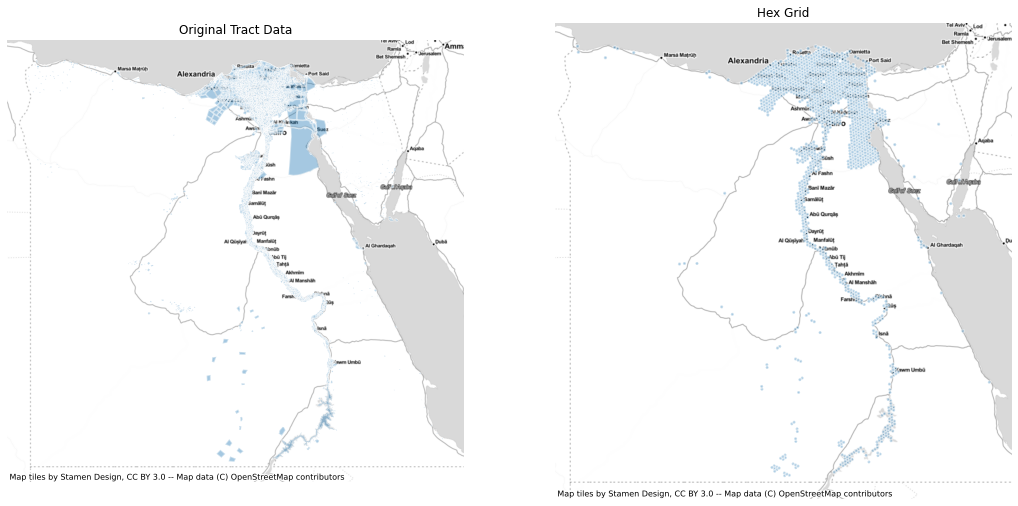

In [6]:
fig, axs = plt.subplots(1,2, figsize=(18,10))
axs=axs.flatten()

dc.plot(ax=axs[0], alpha=0.4, linewidth=1.6, edgecolor='white')
dc_hex.plot(ax=axs[1], alpha=0.4, linewidth=1.6, edgecolor='white')

axs[0].set_title('Original Tract Data')
axs[1].set_title('Hex Grid')

for i,_ in enumerate(axs):
    ctx.add_basemap(axs[i], source=ctx.providers.Stamen.TonerLite)
    axs[i].axis('off')

In [7]:
dc_hex_large = h3fy(dc, resolution=5)
dc_hex_small = h3fy(dc, resolution=7)

C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series w

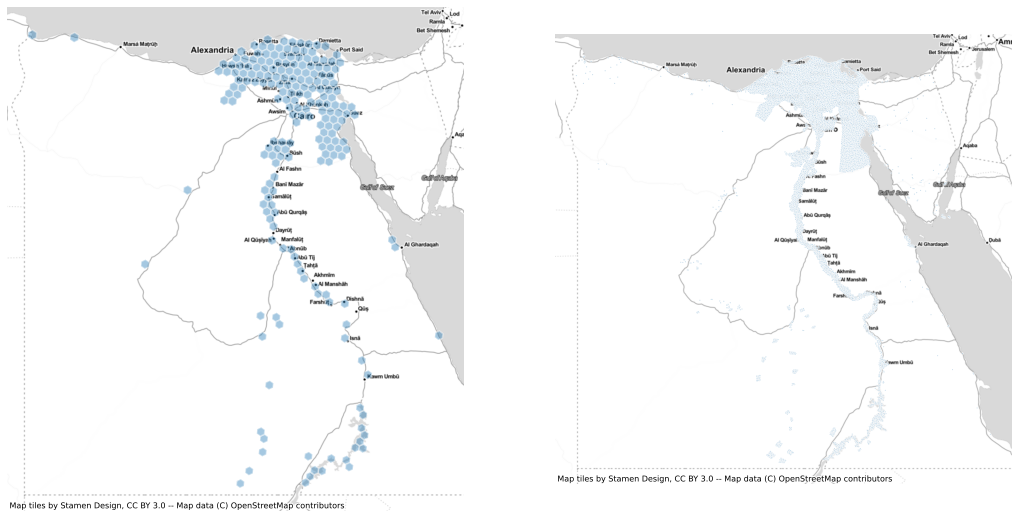

In [8]:
fig, axs = plt.subplots(1,2, figsize=(18,10))

dc_hex_large.plot(ax=axs[0], alpha=0.4, linewidth=1.6, edgecolor='white')
dc_hex_small.plot(ax=axs[1], alpha=0.4, linewidth=1.6, edgecolor='white')

for ax in axs:
    ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
    ax.axis('off')

In [9]:
dc_hex_clipped = h3fy(dc, resolution=5, clip=True)

C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  hexids = pandas.Series(
C:\Users\Youss\AppData\Local\Programs\Python\Python39\lib\site-packages\tobler\util\util.py:141: FutureWarning: The default dtype for empty Series w

(2742921.5407929826, 3917527.697543634, 2474799.182245975, 3773624.4470400056)

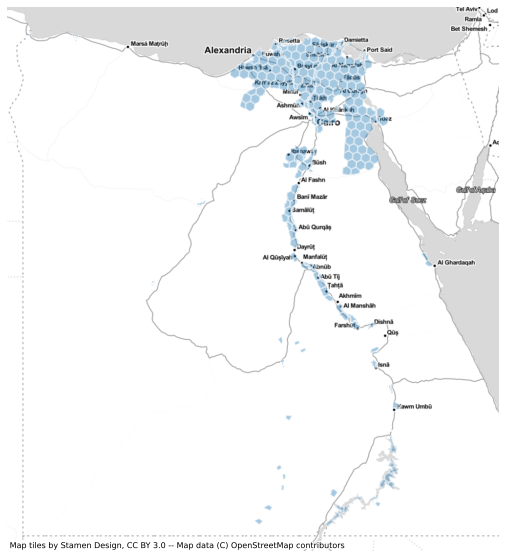

In [10]:
fig, ax = plt.subplots(figsize=(10,10))

dc_hex_clipped.plot(ax=ax, alpha=0.4, linewidth=1.6, edgecolor='white')
ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
ax.axis('off')

In [11]:
dc_hex_interpolated = area_interpolate(source_df=dc, target_df=dc_hex_clipped, intensive_variables=['PM2.5'])

C:\Users\Youss\AppData\Roaming\Python\Python39\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\Youss\AppData\Roaming\Python\Python39\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 2
  Warn("Warning: setting k to %d" % k_q, UserWarning)


Text(0.5, 0.98, 'Spatial Interpolation with the PySAL $\\mathtt{tobler}$ package')

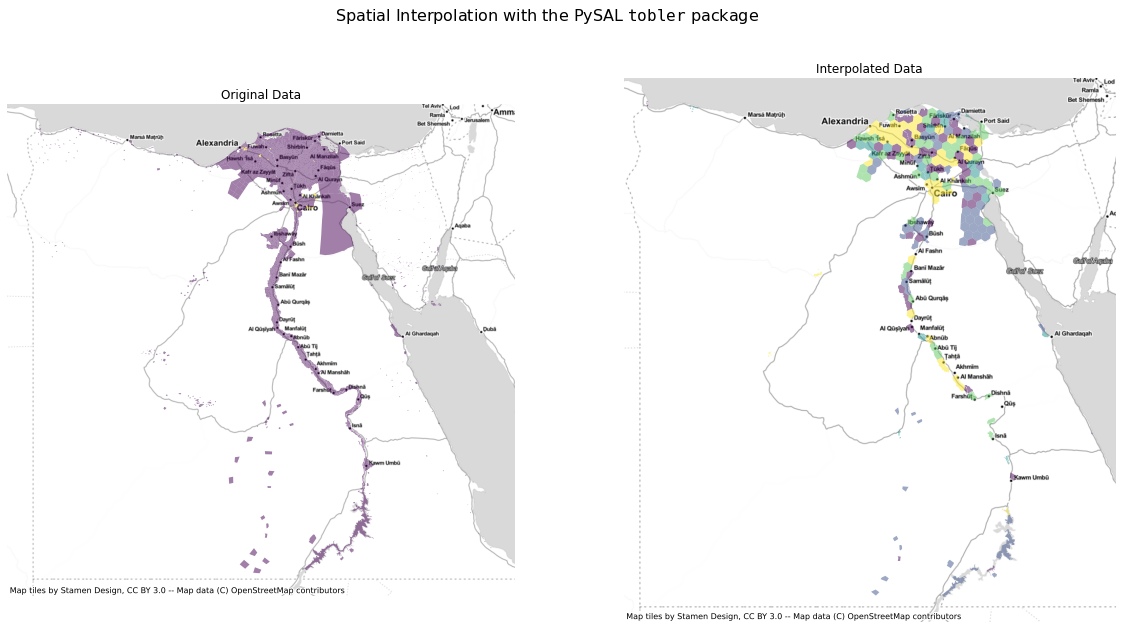

In [12]:
fig, axs = plt.subplots(1,2, figsize=(20,10))
dc.plot('PM2.5', scheme='quantiles', alpha=0.5, ax=axs[0])

dc_hex_interpolated.plot('PM2.5', scheme='quantiles', alpha=0.5, ax=axs[1])

axs[0].set_title('Original Data')
axs[1].set_title('Interpolated Data')
           
for ax in axs:
    ctx.add_basemap(ax=ax, source=ctx.providers.Stamen.TonerLite)
    ax.axis('off')
plt.suptitle('Spatial Interpolation with the PySAL $\mathtt{tobler}$ package', fontsize=16)

In [13]:
import leafmap.kepler as leafmap
m = leafmap.Map()
m.add_gdf(dc_hex_interpolated)
m

Map(config={'version': 'v1', 'config': {'mapState': {'latitude': 20, 'longitude': 0, 'zoom': 1.3, 'bearing': 0…

In [14]:
from cartoframes.viz import Layer, color_bins_style, popup_element

Layer(
    dc_hex_interpolated,
    color_bins_style('PM2.5', palette='pinkyl', bins=10, opacity=0.8),
    default_widget=True,
    default_popup_hover=False,
    popup_hover=[
        popup_element('PM2.5', 'PM2.5')
    ],
)